# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [99]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [114]:
online_rt = pd.read_csv('Online_Retail.csv',encoding='latin1')

In [115]:
online_rt.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

<AxesSubplot: xlabel='Country', ylabel='Max_Quantity'>

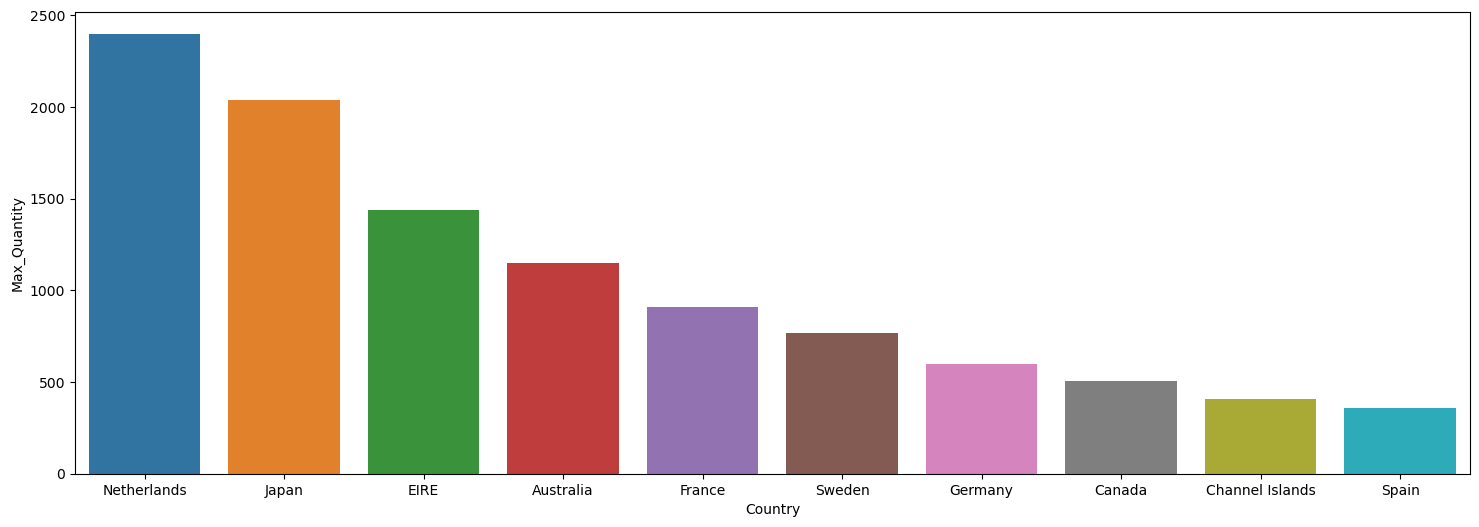

In [10]:
mostQnty = online_rt.groupby(by="Country")[["Quantity"]].max().add_prefix("Max_")
mostQnty = mostQnty.sort_values(by="Max_Quantity",ascending=False).reset_index()
mostQnty.drop(mostQnty[mostQnty.Country == "United Kingdom"].index,inplace=True)
mostQnty = mostQnty.drop(mostQnty.index[10:]).reset_index(drop=True)
import seaborn as sns
# sns.barplot(x="Country",y="Max_Quantity",data=mostQnty)
plt.figure(figsize=(18,6))
sns.barplot(x="Country",y="Max_Quantity",data=mostQnty)

### Step 5.  Exclude negative Quantity entries

In [116]:
online_rt = online_rt[(online_rt.Quantity>0)].reset_index(drop=True)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [119]:
# online_rt.loc[:,(online_rt!=0).any(axis=0)].sort_values(by='UnitPrice', ascending=True)
# online_rt = online_rt.dropna(how='any',axis=0) 
online_rt['QbyU'] = online_rt['Quantity'].div(online_rt['UnitPrice'].values)

In [117]:
online_rt = online_rt.replace(0, np.nan).dropna(axis=1, how="all")

In [118]:

online_rt.sort_values(by='UnitPrice', ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
293622,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.060,NaN,United Kingdom
293621,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.060,NaN,United Kingdom
352406,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/11 14:58,0.001,16198.0,United Kingdom
153780,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/11 9:27,0.001,13952.0,United Kingdom
273135,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/11 10:13,0.001,15618.0,United Kingdom
...,...,...,...,...,...,...,...,...
524788,581211,22142,check,14,12/7/11 18:36,NaN,NaN,United Kingdom
526416,581234,72817,NaN,27,12/8/11 10:33,NaN,NaN,United Kingdom
527920,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/11 13:58,NaN,NaN,United Kingdom
527921,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/11 13:58,NaN,NaN,United Kingdom


In [120]:
Qup = online_rt[["CustomerID","Country",'Quantity','UnitPrice','QbyU']].copy()
Qup=Qup.dropna().reset_index(drop=True)

In [121]:
Qup

,CustomerID,Country,Quantity,UnitPrice,QbyU
0,17850.0,United Kingdom,6,2.55,2.352941
1,17850.0,United Kingdom,6,3.39,1.769912
2,17850.0,United Kingdom,8,2.75,2.909091
3,17850.0,United Kingdom,6,3.39,1.769912
4,17850.0,United Kingdom,6,3.39,1.769912
...,...,...,...,...,...
397879,12680.0,France,12,0.85,14.117647
397880,12680.0,France,6,2.10,2.857143
397881,12680.0,France,4,4.15,0.963855
397882,12680.0,France,4,4.15,0.963855


In [122]:
Qup.sort_values(by='QbyU',ascending=False)

,CustomerID,Country,Quantity,UnitPrice,QbyU
37120,12346.0,United Kingdom,74215,1.04,71360.576923
188799,14609.0,United Kingdom,3186,0.06,53100.000000
57499,14609.0,United Kingdom,2400,0.06,40000.000000
397411,16446.0,United Kingdom,80995,2.08,38939.903846
154662,13694.0,United Kingdom,1600,0.06,26666.666667
...,...,...,...,...,...
269568,15502.0,United Kingdom,1,3155.95,0.000317
295229,12744.0,Singapore,1,3949.32,0.000253
308820,12536.0,France,1,4161.06,0.000240
308796,12536.0,France,1,4161.06,0.000240


In [123]:
Qup

,CustomerID,Country,Quantity,UnitPrice,QbyU
0,17850.0,United Kingdom,6,2.55,2.352941
1,17850.0,United Kingdom,6,3.39,1.769912
2,17850.0,United Kingdom,8,2.75,2.909091
3,17850.0,United Kingdom,6,3.39,1.769912
4,17850.0,United Kingdom,6,3.39,1.769912
...,...,...,...,...,...
397879,12680.0,France,12,0.85,14.117647
397880,12680.0,France,6,2.10,2.857143
397881,12680.0,France,4,4.15,0.963855
397882,12680.0,France,4,4.15,0.963855


In [124]:
Qup.drop(Qup[Qup["Country"] == "United Kingdom"].index,inplace=True)

In [125]:
Qup


,CustomerID,Country,Quantity,UnitPrice,QbyU
26,12583.0,France,24,3.75,6.400000
27,12583.0,France,24,3.75,6.400000
28,12583.0,France,12,3.75,3.200000
29,12583.0,France,12,0.85,14.117647
30,12583.0,France,24,0.65,36.923077
...,...,...,...,...,...
397879,12680.0,France,12,0.85,14.117647
397880,12680.0,France,6,2.10,2.857143
397881,12680.0,France,4,4.15,0.963855
397882,12680.0,France,4,4.15,0.963855


In [126]:
Qup.Country.unique()

array(['France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Bahrain', 'Malta', 'RSA'], dtype=object)

In [130]:
Qup.head(30)

,CustomerID,Country,Quantity,UnitPrice,QbyU
26,12583.0,France,24,3.75,6.400000
27,12583.0,France,24,3.75,6.400000
28,12583.0,France,12,3.75,3.200000
29,12583.0,France,12,0.85,14.117647
30,12583.0,France,24,0.65,36.923077
31,12583.0,France,48,0.85,56.470588
32,12583.0,France,24,1.25,19.200000
33,12583.0,France,18,2.95,6.101695
34,12583.0,France,24,2.95,8.135593
35,12583.0,France,24,1.95,12.307692


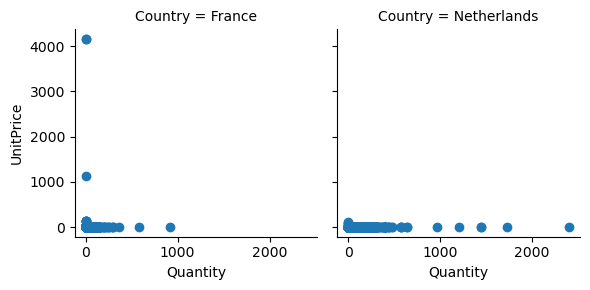

In [132]:
# Qup = Qup.drop(Qup.index[7:]).reset_index(drop=True)
top_countries =  ['France', 'Australia', 'Netherlands']

Qup = Qup[Qup['Country'].isin(top_countries)]
g = sns.FacetGrid(Qup, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

,CustomerID,Country,Quantity,UnitPrice,QbyU
0,12474.0,Germany,100,0.04,2500.0
1,12475.0,Germany,100,0.04,2500.0
2,14911.0,EIRE,100,0.04,2500.0
3,12522.0,Germany,100,0.04,2500.0
4,14156.0,EIRE,100,0.04,2500.0
5,12635.0,Germany,100,0.04,2500.0
6,14911.0,EIRE,100,0.04,2500.0


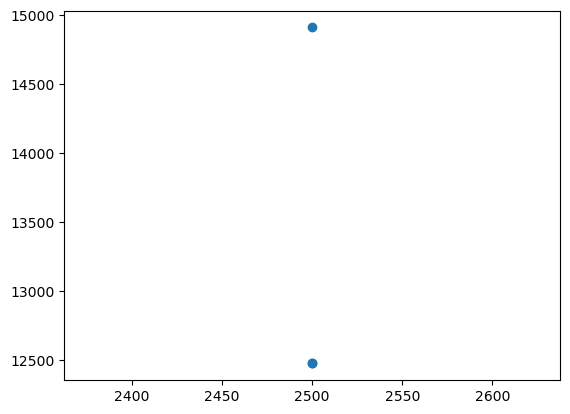

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

##### Step 7.3.3 Plot

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

##### Step 7.4.2 Zoom in so we can see that curve more clearly

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [135]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
price_start = 0 
price_end = 50
price_interval = 1

buckets = np.arange(price_start,price_end,price_interval)
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

#### 8.3 Plot.

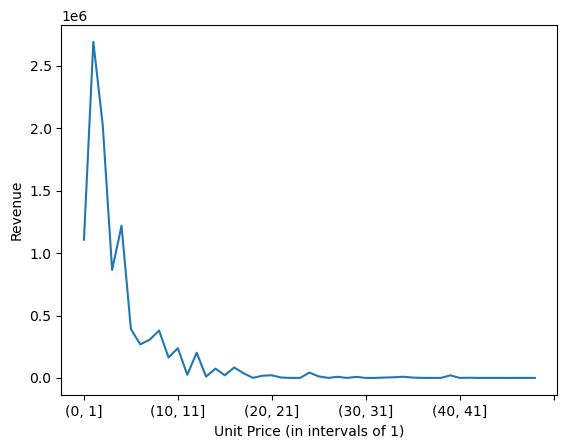

In [136]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

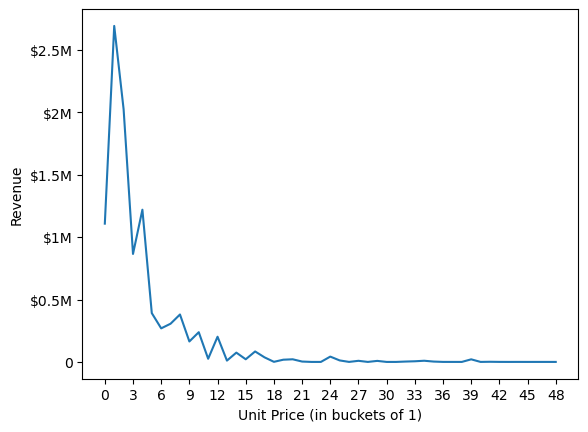

In [137]:
revenue_per_price.plot()

plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()


### BONUS: Create your own question and answer it.